In [8]:
""""
This script plots maps of t-values thresholded at p < 0.05
"""

# Import packages
import numpy as np
import pickle
import mne
import os
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors as mcolors

# User input: Set your "base" directory - the folder containing sub-folders for each TFCE run
base_dir = "C:/meg/TFCE"

def plot_stc_grid(stcs, labels, boosted):
    """
    Saves a plot of STCs in an  n x 3 (brain x view) grid. 
    
    Parameters
    ----------
    stcs : list of SourceEstimate
        One STC per row.
    labels : list of str
        Row labels. 
    boosted : boolean
        True if input represents t-values that are TFCE-boosted, false otherwise
    """
    views = ['lateral', 'dorsal', 'lateral']
    hemis = ['lh', 'both', 'rh']

    #base = plt.cm.viridis
    #colormap = mcolors.LinearSegmentedColormap.from_list("trunc_viridis", base([0.1, 0.9]))
    colormap = "coolwarm"

    n = len(stcs)
    fig, axes = plt.subplots(n, 5, figsize=(13, 4 * n),
                         gridspec_kw=dict(width_ratios=[1, 1, 1, 0.1, 0.1]))

    if n == 1:
        axes = axes[np.newaxis, :]

    for row, stc in enumerate(stcs):

        stc.data = np.round(stc.data, 1)

        clim = dict(kind="value", pos_lims=[0, np.round(np.max(np.abs(stc.data))/2, 1), np.max(np.abs(stc.data))])

        for col, (view, hemi) in enumerate(zip(views, hemis)):

            brain = stc.plot(
                subject='fsaverage',
                subjects_dir="C:/meg/NVAR_ICC_day/MRI/freesurfer/",
                hemi=hemi,
                views=view,
                clim=clim,
                colormap= colormap, 
                background='white', 
                #surface = "pial", 
                colorbar = False
            )

            img = brain.screenshot()
            axes[row, col].imshow(img)
            axes[row, col].axis('off')
            plt.close('all')

        mne.viz.plot_brain_colorbar(axes[row, 4], clim, colormap, label=None)
        axes[row, 3].axis('off')

        axes[row, 0].text(-0.1, 0.5, labels[row], transform=axes[row, 0].transAxes,
                  fontsize=20, va='center', ha='right', rotation=0)

    col_titles = ['Left Lateral', 'Dorsal', 'Right Lateral']
    for col, title in enumerate(col_titles):
        axes[0, col].set_title(title, fontsize=20)

    fig.tight_layout()
    if (boosted): 
        fig.savefig(base_dir + "/Tvals_boosted_threshed005.png", dpi=300, bbox_inches='tight')
    else: 
        fig.savefig(base_dir + "/Tvals_threshed005.png", dpi=300, bbox_inches='tight')

def make_and_plot_stc(folders, labels, boosted): 
    """
    Given a list of paths to folders containing t- and p-values, reads files, makes thresholded STCs, then saves plots.
    
    Parameters
    ----------
    folders : list of str
        Folders containing models
    labels : 
        Row names on plot
    boosted : bool
        True if input represents t-values that are TFCE-boosted, false otherwise
    """

    stcs = []

    for folder in folders: 

        os.chdir(os.path.join(base_dir, folder))

        # p values
        Pv = pd.read_csv('cluster_pvalues.csv')
        
        if (not boosted): 
            data = pd.read_csv('observed_raw_t_values.csv') # raw t values
            name = "observed_t_value"
        else: 
            data = pd.read_csv('T_obs_tfce.csv') # tfce-boosted t values
            name = "tfce_stat"

        # Create a mask of non-sig p values
        mask = Pv["p_value"] > 0.05
        Threshed = data[name].to_numpy().copy()
        Threshed[mask] = 0 # modifies in-place

        stc = mne.SourceEstimate(
            data = Threshed, 
            vertices = [np.arange(0, 10242), np.arange(0, 10242)], 
            tmin = 0, 
            tstep = 1
        )

        stcs.append(stc)

    return plot_stc_grid(stcs, labels, boosted)


make_and_plot_stc(
    folders=["TFCE_age_outputs_5000perm_2tail_savedRaw", "TFCE_ageAndACER_outputs_5000perm_2tail_savedRaw", "TFCE_ageAndCATTELL_outputs_5000perm_2tail_savedRaw"],
    labels=['Age', 'ACER \n (age-controlled)', 'CATTELL \n (age-controlled)'], 
    boosted = True
)


False
False
False
False
False
False
False
False
False


### Learn about your data

In [114]:
# p values
print(Pv["p_value"].min())
print(Pv["p_value"].max())

# raw t values
print(T["observed_t_value"].min())
print(T["observed_t_value"].max())

# tfce-boosted t values
print(T_boosted["tfce_stat"].min())
print(T_boosted["tfce_stat"].max())

0.0126
1.0
-4.166383593044194
0.096295094452166
-50.51680772501421
0.0


In [101]:
def stc_plot(stc, hemi, colorbar_bool, view, name, threshed): 
    brain = stc.plot(
        subject="fsaverage",
        subjects_dir="C:/meg/params/fs_subjects/",
        hemi=hemi,
        surface="inflated", 
        time_viewer = True,
        background = "white", 
        clim=dict(kind="value", pos_lims=[0, abs(np.min(df))/2, abs(np.min(df))]), 
        colorbar = colorbar_bool
    )
    brain.show_view(view)
    brain.save_image(os.path.join(base_dir, test_dir, test_dir + "_" + name + "_" + view + "_" + hemi + "_" + threshed + ".png"))

In [102]:
# USER INPUT
name = "tfce_stat"
data = T_boosted



# Plot thresholded t-values









######## all T-VALUES ########

df = data[name].to_numpy()

stc = mne.SourceEstimate(
    data = df,
    vertices = [np.arange(0, 10242), np.arange(0, 10242)], 
    tmin = 0, 
    tstep = 1
)

stc_plot(stc, hemi, colorbar_bool, view, name, threshed="")


######## THRESHOLDED T-VALUES ########

# Create a mask of non-sig p values
mask = Pv["p_value"] > 0.05
Threshed = data[name].to_numpy().copy()
Threshed[mask] = 0 # modifies in-place

stc = mne.SourceEstimate(
    data = Threshed, # numpy array
    vertices = [np.arange(0, 10242), np.arange(0, 10242)], 
    tmin = 0, 
    tstep = 1
)

stc_plot(stc, hemi, colorbar_bool, view, name, threshed="threshed_005")

False
False


False
False
False


(np.float64(-0.5), np.float64(362.5), np.float64(251.5), np.float64(-0.5))

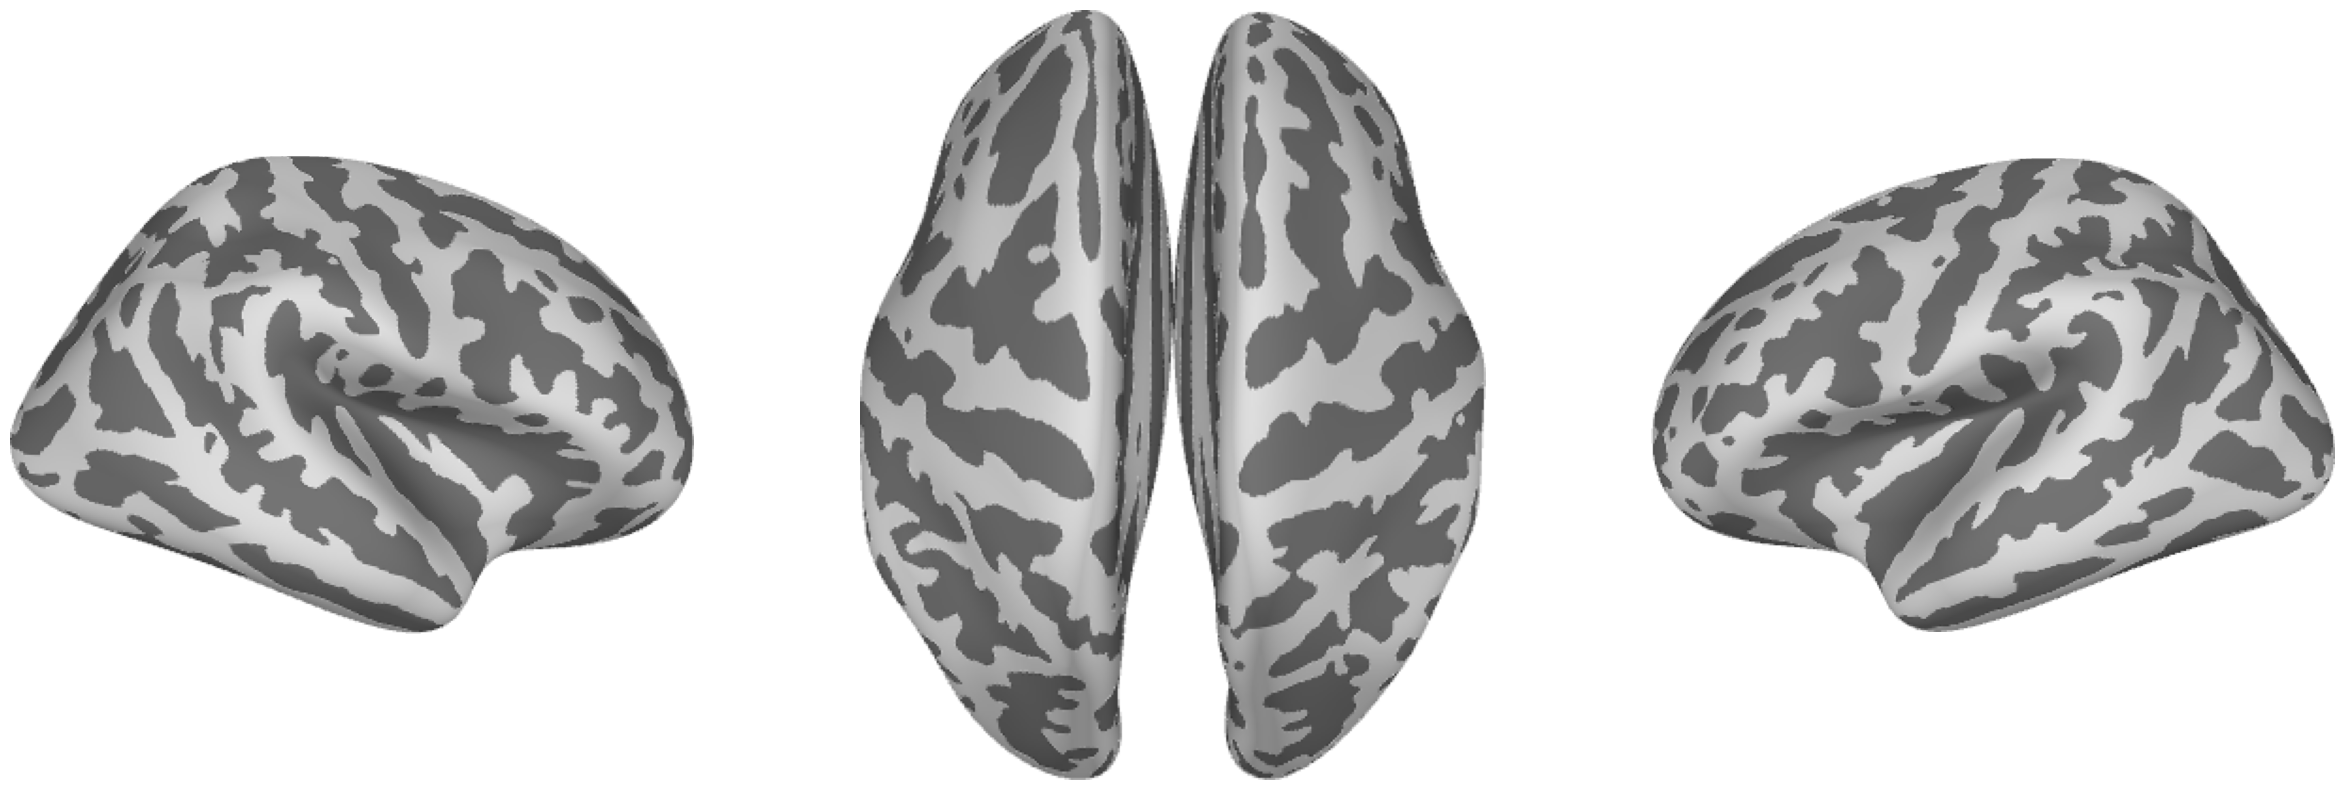

In [138]:
from mpl_toolkits.axes_grid1 import ImageGrid, inset_locator, make_axes_locatable


colormap = "viridis"
clim = dict(kind="value", lims=[4, 8, 12])

def plot_and_crop(view, hemi):
    """
    Plots stc with given view, and crops it
    Input: one of "lat" or "dorsal"; one of "lh", "rh", or "both"
    Returns a screenshot of the plot
    """
    brain = stc.plot(
        views=view,
        hemi=hemi,
        size=(800, 400),
        subject="fsaverage",
        subjects_dir="C:/meg/params/fs_subjects/",
        initial_time=0,
        background="w",
        colorbar=False,
        clim=clim,
        colormap=colormap,
        time_viewer=False,
        show_traces=False
    )
    screenshot = brain.screenshot()
    nonwhite_pix = (screenshot != 255).any(-1)
    nonwhite_row = nonwhite_pix.any(1)
    nonwhite_col = nonwhite_pix.any(0)
    cropped_screenshot = screenshot[nonwhite_row][:, nonwhite_col]
    return cropped_screenshot

# figsize unit is inches
fig, axes = plt.subplots(
    nrows=1, ncols=3, figsize=(30, 10))

subplot0 = plot_and_crop("lat", "rh")
subplot1 = plot_and_crop("dorsal", "both")
subplot2 = plot_and_crop("lat", "lh")

axes[0].imshow(subplot0)
axes[0].axis("off")
axes[1].imshow(subplot1)
axes[1].axis("off")
axes[2].imshow(subplot2)
axes[2].axis("off")
#fig.subplots_adjust(left=0.15, right=0.9, bottom=0.01, top=0.9, wspace=0.1, hspace=0.5)
